<div style="text-align: center;">
  <h1>Computer Assignment 1</h1>
    <h2> Amin Aghakasiri 810101381</h2>
    <h2> Amirhossein Arefzadeh 810101604</h2>
    <h2> Aria Azem 810101608</h2>
</div>

## Task 1: Sampling

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

The formula for 2D gaussian distribution is:

$$p(x) = \frac{1}{(2\pi)^{d/2} \,\sqrt{|\Sigma|}} \,\exp\!\Bigl(-\tfrac12 \,(x - \mu)^\top\,\Sigma^{-1}\,(x - \mu)\Bigr)$$


where $d$ is the dimension which in here is 2 because it is 2D gaussian and $x \in \mathbb{R}^d$, $\mu$ is the mean vector and $\Sigma$ is the covariance matrix that it's dimension is $d \times d$.

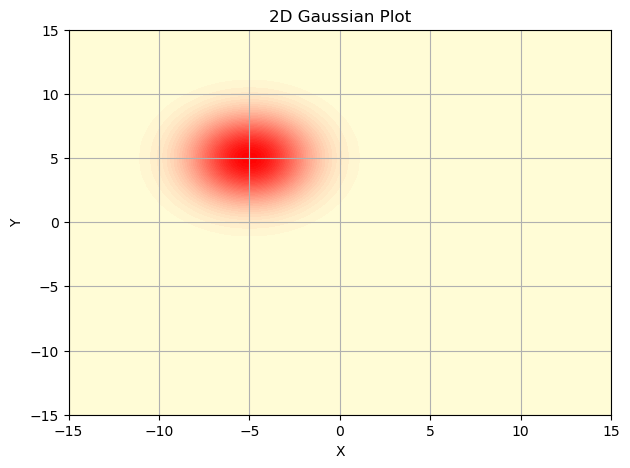

In [39]:
mean = np.array([-5, 5])            
cov  = np.array([[5, 0],
                 [0, 5]]) 
size = 100
X_ax = np.linspace(-15, 15, size)
Y_ax = np.linspace(-15, 15, size)
X, Y = np.meshgrid(X_ax, Y_ax)
Z = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        point = np.array([X[i,j], Y[i,j]])
        temp = point - mean
        Z[i,j] = (1.0 / ((2*np.pi)**(2/2) * (np.linalg.det(cov)**0.5))) * np.exp(-0.5 * temp.T @ np.linalg.inv(cov) @ temp)
plt.figure(figsize=(7,5))
plt.contourf(X, Y, Z, levels = 50,
                cmap = mcolors.LinearSegmentedColormap.from_list("color", [(1.0, 1.0, 0.85), (1.0, 0.0, 0.0)]))
plt.title("2D Gaussian Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


**Multivariate Gaussian PDF**  

As I have said at the first, a d-dimensional Gaussian (normal) distribution with mean $\mu$  and covariance matrix $\Sigma \in \mathbb{R}^{d \times d}$, the PDF is

$$ p(x) = \frac{1}{(2\pi)^{\frac{d}{2}} \,\sqrt{\lvert \Sigma \rvert}} \exp\!\Bigl( -\tfrac12\,(x-\mu)^\top \,\Sigma^{-1}\,(x-\mu) \Bigr)\quad
$$

Taking the natural logarithm of p(x) will result:

$$ \log p(x) = -\log\Bigl((2\pi)^{\frac{d}{2}} \sqrt{\lvert \Sigma \rvert}\Bigr) \;-\;
\tfrac12\,(x-\mu)^\top\,\Sigma^{-1}\,(x-\mu)
$$

which the first term is a constant with respect to x and does not depend on x and the second term depends on x.

The score function is calculated like below:

$$\nabla_x \log p(x)$$

For a Gaussian, as I have shown above, the derivative of the log of the PDF is:

$$\nabla_x \log p(x) = -\Sigma^{-1}\,\bigl(x - \mu\bigr)$$

In [40]:
X_point, Y_point = np.meshgrid(np.linspace(-15, 15, 20), np.linspace(-15, 15, 20))
X_dir = np.zeros_like(X_point) 
Y_dir = np.zeros_like(Y_point) 
cov_inverse = np.linalg.inv(cov)        
for i in range(X_point.shape[0]):
    for j in range(X_point.shape[1]):
        point = np.array([X_point[i,j], Y_point[i,j]])
        gradient = -cov_inverse @ (point - mean)
        X_dir[i,j] = gradient[0]
        Y_dir[i,j] = gradient[1]

For each point, I have computed the score which is a 2D vector and I have stored its x-components in X_dir[i,j] and y-components in Y_dir[i,j] for each point. Then by using plt.quiver() function below, I have plotted the arrows at (X_point, Y_point) with directions (X_dir, Y_dir).

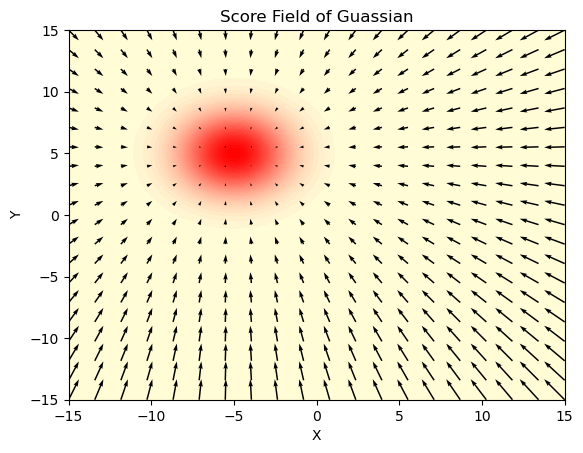

In [41]:
plt.figure()
plt.contourf(X, Y, Z, levels = 50,
                cmap = mcolors.LinearSegmentedColormap.from_list("color", [(1.0, 1.0, 0.85), (1.0, 0.0, 0.0)]))
plt.quiver(X_point, Y_point, X_dir, Y_dir)
plt.title("Score Field of Guassian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**Langevin Dynamics**

Due to the project description, if $x_t \in \mathbb{R}^d$ be the state at iteration t, the Langevin Dynamics algorithm updates $x_t$ to $x_{t+1}$ like below:

$$ x_{t+1} = x_t + \epsilon \,\nabla_x \log p\bigl(x_t\bigr) + \sqrt{2\,\epsilon}\,z_t $$

where $\epsilon > 0$ is the step size (learning rate), $z_t \sim \mathcal{N}(0, I)$ is a standard Gaussian noise vector of dimension d and $\nabla_x \log p\bigl(x_t\bigr)$ is the score function or the gradient of the log-probability.


In [42]:
def langevin_dynamics(
    initialize_p,    
    steps,       
    epsilon   
):
    N = initialize_p.shape[0]
    trajectory = np.zeros((steps+1, N, 2))
    trajectory[0] = initialize_p
    current_points = initialize_p.copy()
    for t in range(steps):
        for i in range(N):
            grad_logp = -cov_inverse @ (current_points[i] - mean) 
            noise = np.random.randn(2)  
            current_points[i] += epsilon * grad_logp + np.sqrt(2*epsilon)*noise
        trajectory[t+1] = current_points
    return current_points, trajectory

Now after writing the function, I will use the Langevin Dynamics algorithm to sample from the 2D Gaussian distribution. I will set the step size $\epsilon = 0.5$ and the number of iterations $T = 40$. The initial state $x_0$ is set to be a random point in the 2D space. The Langevin Dynamics algorithm is run for T iterations, and at each iteration, I will update the state using the formula above. After T iterations, I will plot the final state of the Langevin Dynamics algorithm.

Initial points for Langevin Dynamics:
[[  8.1396193  -14.37744152]]


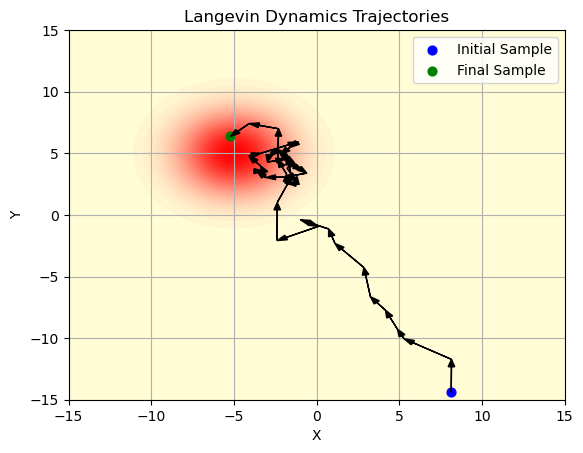

In [43]:
np.random.seed(10) 
initialize_p = np.random.uniform(low = -15, high = 15, size = (1, 2))
print("Initial points for Langevin Dynamics:")
print(initialize_p)
temp_tmp, trajectory = langevin_dynamics(
    initialize_p = initialize_p,
    steps = 40,   
    epsilon = 0.5
)
plt.figure()
plt.grid(True)
plt.contourf(X, Y, Z, levels = 50,
                cmap = mcolors.LinearSegmentedColormap.from_list("color", [(1.0, 1.0, 0.85), (1.0, 0.0, 0.0)]))
temp, N, _ = trajectory.shape
steps = temp - 1 

for i in range(N):
    path = trajectory[:, i, :] 
    x_init, y_init = path[0]
    plt.scatter(x_init, y_init, c = "blue", s = 40, zorder = 3, label = "Initial Sample")
    x_final, y_final = path[-1]
    plt.scatter(x_final, y_final, c = "green", s = 40, zorder = 3, label = "Final Sample")
    for t in range(steps):
        first_x, first_y = path[t]
        nxt_x, nxt_y  = path[t+1]
        plt.arrow(
            first_x,
            first_y,
            nxt_x - first_x,
            nxt_y - first_y,
            length_includes_head = True,
            head_width = 0.4,
            color = "black",  
            zorder = 3    
        )
plt.title("Langevin Dynamics Trajectories")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

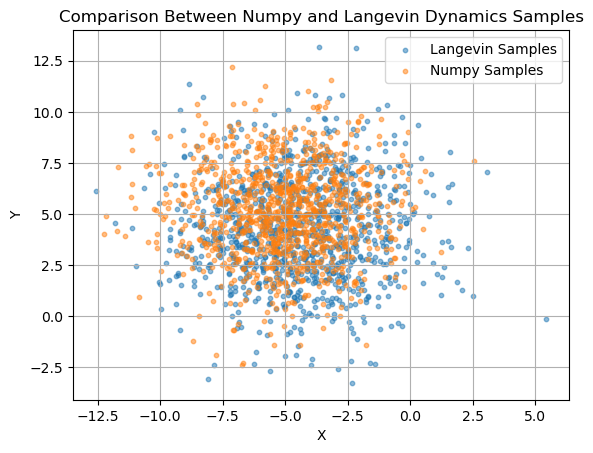

In [44]:
N = 1000
np.random.seed(10) 
initialize_ptemp = np.random.uniform(low=-15, high=15, size = (N, 2))
langevin_samples, _ = langevin_dynamics(
    initialize_p = initialize_ptemp,
    steps=1000, 
    epsilon=0.01
)
numpy_samples = np.random.multivariate_normal(mean, cov, size = N)
plt.figure()
plt.scatter(langevin_samples[:,0], langevin_samples[:,1], s=10, alpha=0.5, label="Langevin Samples")
plt.scatter(numpy_samples[:,0], numpy_samples[:,1], s=10, alpha=0.5, label="Numpy Samples")
plt.title("Comparison Between Numpy and Langevin Dynamics Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()

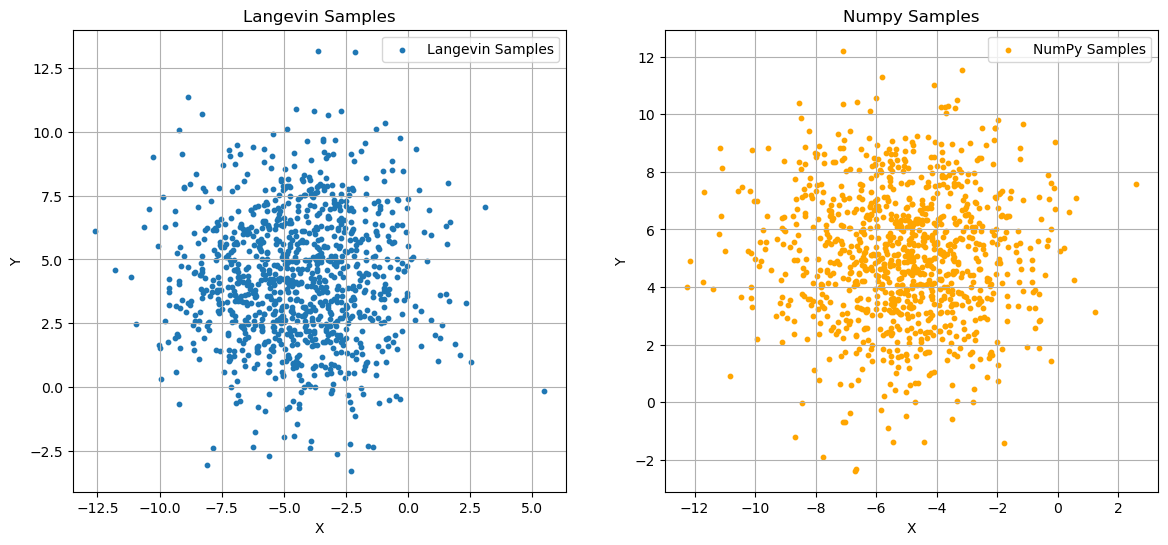

In [45]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.scatter(langevin_samples[:,0], langevin_samples[:,1], s = 10, label = "Langevin Samples")
plt.title("Langevin Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(numpy_samples[:,0], numpy_samples[:,1], s = 10, label = "NumPy Samples", color = "orange")
plt.title("Numpy Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


We see that in both cases, there is a kind of cloud of points around the mean that is on (-5,5). Also, they spread in the radius of approximately $\sqrt{5}$ which is radical of covariance in each direction. Also we see that with the chosen epsilon and number of steps for Langevin, the samples drawn from Langevin Dynamic are very close to the samples from the multivariate Gaussian distribution from numpy. The samples from Langevin Dynamic are more concentrated around the mean and have a smaller spread compared to the samples from the multivariate Gaussian distribution. This is because the Langevin Dynamics algorithm uses the score function to guide the sampling process, which helps to focus the samples around the mean of the distribution. Also for other ways of comparing these two, we can compare the convergence speed or the computation time too.

## Bonus Question

### In the sampling part, suppose that instead of a gaussian distribution, we have a mixture of gaussians, will we be able to take proper samples using langevin dynamics algorithm?

#### Answer:

Firstly, I will show the formula for the mixture of two gaussians and then I will show how to compute the score function for it.
The distribution is like below:
$$ p(x) \;=\; \alpha\,\mathcal{N}\bigl(x;\,\mu_1,\Sigma_1\bigr)
\;+\;
\bigl(1-\alpha\bigr)\,\mathcal{N}\bigl(x;\,\mu_2,\Sigma_2\bigr)$$


The logarithm of the mixture of two gaussians is like below:
$$ \log p(x)
\;=\;
\log\!\Bigl[
  \alpha \, \mathcal{N}\bigl(x;\,\mu_1,\Sigma_1\bigr)
  \;+\;
  \bigl(1-\alpha\bigr)\,\mathcal{N}\bigl(x;\,\mu_2,\Sigma_2\bigr)
\Bigr]$$

Now, it's time to calculate the score function. We want $\nabla_x \log p(x).$
Using the chain rule for a log of a sum, we get:
$$
\nabla_x \log p(x)
\;=\;
\frac{
  \alpha\,\mathcal{N}\bigl(x;\,\mu_1,\Sigma_1\bigr)\,\nabla_x \log \mathcal{N}\bigl(x;\,\mu_1,\Sigma_1\bigr)
  \;+\;
  \bigl(1-\alpha\bigr)\,\mathcal{N}\bigl(x;\,\mu_2,\Sigma_2\bigr)\,\nabla_x \log \mathcal{N}\bigl(x;\,\mu_2,\Sigma_2\bigr)
}{
  \alpha\,\mathcal{N}\bigl(x;\,\mu_1,\Sigma_1\bigr)
  \;+\;
  \bigl(1-\alpha\bigr)\,\mathcal{N}\bigl(x;\,\mu_2,\Sigma_2\bigr)
}
$$

For Gaussian distribution we know:
$$
\nabla_x \log \mathcal{N}(x;\,\mu,\Sigma)
\;=\;
-\,\Sigma^{-1}\,\bigl(x - \mu\bigr)
$$

So we have:
$$
\nabla_x \log \mathcal{N}\bigl(x;\,\mu_1,\Sigma_1\bigr) = -\,\Sigma_1^{-1}\,(x - \mu_1),
\quad
\nabla_x \log \mathcal{N}\bigl(x;\,\mu_2,\Sigma_2\bigr) = -\,\Sigma_2^{-1}\,(x - \mu_2)
$$

At last, the final formula will be like below:
$$
\nabla_x \log p(x)
\;=\;
\frac{
  \alpha\,\mathcal{N}\bigl(x;\,\mu_1,\Sigma_1\bigr)\,\bigl[-\Sigma_1^{-1}(x-\mu_1)\bigr]
  \;+\;
  (1-\alpha)\,\mathcal{N}\bigl(x;\,\mu_2,\Sigma_2\bigr)\,\bigl[-\Sigma_2^{-1}(x-\mu_2)\bigr]
}{
  \alpha\,\mathcal{N}\bigl(x;\,\mu_1,\Sigma_1\bigr) + (1-\alpha)\,\mathcal{N}\bigl(x;\,\mu_2,\Sigma_2\bigr)
}
$$


Now for the answer to the question. Technically, yes it’s possible to derive the mixture’s score and run Langevin. We can mathematically define and implement Langevin Dynamics for a Gaussian mixture because we can compute $\nabla_x \log p(x)$ for that mixture as I did anove. But if the mixture is multi-modal (the two Gaussians are well-separated), a single Langevin chain often gets stuck in just one of the modes and fails to explore both modes completely. Therefore, we might not get a set of samples that correctly represent both Gaussians. In the other hand, if we use basic Langevin (just one chain), we often won’t get correct overall samples that represent both Gaussians adn our chain may remain stuck in whichever mode it lands in first. So we should use more advanced methods to ensure that we sample from both modes.